## Going13 : Face Detection

### 13-1 Dlib 얼굴 인식의 문제점

#### Dlib 라이브러리를 이용해 Face Landmark를 찾아낼 때의 문제점은 무엇이었나?

 - 얼굴을 잘 못 찾는다.
 - 동영상을 처리하기엔 너무 느리다.
 - 얼굴각도, 방향, 크기 등의 변화에 취약하다.
 - 그 외에도 많은 문제점을 발견할 수 있다.
 
 서버로 이미지를 보내고 처리하는 방식은 `네트워크 비용 + 서버 비용 + 인터넷 속도`의 영향을 고려해야한다. 그래서 핸드폰에 모델을 올리려면 weight가 작은 모델이 관리에 유리하다. 하지만 작은 모델은 성능이 떨어지기 때문에 어떻게 보완 해야할 지 고민이고 활발히 연구 중에 있다.
 
카카오 얼굴인식 관련 리서치 - https://tech.kakaoenterprise.com/63

네이버 얼굴검출 관련 오픈소스 - https://github.com/clovaai/EXTD_Pytorch


#### 어떻게 빠르게 만들 수 있을까?

`Face Detection`에서 많은 시간이 드는 요소는 `Sliding window`이다. 이를 버려야 빨라진다. 따라서 2-stage의 detection은 좋은 선택이 아니다. 또, 연산의 병렬화가 가능해야 한다.

컴퓨터는 GPU에서 병렬화가 가능하다. 핸드폰은 크게 안드로이드, 아이폰으로 나누어 생각할 수 있는데 `안드로이드에서는 MLKit`, `아이폰에서는 CoreML`이라는 라이브러리를 통해 병렬화 할 수 있다. 하지만 제한이 많기 때문에 `TFLite`라는 도구를 이용해 훈련된 모델을 이용하기도 한다.

 - `Core ML` - https://developer.apple.com/documentation/coreml  
 
 
 - `ios 11 machine learning for everyone` - http://machinethink.net/blog/ios-11-machine-learning-for-everyone/  
 
 
 - `ML kit` - https://developers.google.com/ml-kit  
 
 
 - `TFLite` - https://www.tensorflow.org/lite?hl=ko

비교적 쉬운 방법으로 병렬화 도구를 사용하는 방법이 있다.

 - `SIMD-병렬-프로그래밍` - https://stonzeteam.github.io/SIMD-%EB%B3%91%EB%A0%AC-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/  
 
 
 - `OpenCL` - https://www.khronos.org/opencl/  
 
 
 - `Android: Open GL ES` - https://developer.android.com/guide/topics/graphics/opengl?hl=ko



### 13-2 Single Stage Object Detection

정리하면 2-Stage Detector는 물체가 존재하는 bounding box를 먼저 찾은 (localization) 후 bounding box를 분류 (classification)하는 두 가지 과정을 순차적으로 거쳤기 때문에 속도가 느렸다.

얼굴 인식처럼 딥러닝 모델이 가벼워야하는 task는 `1-Stage 기반`을 사용하는 것이 유리하다. 1-Stage Detector는 localization과 classification을 동시에 수행한다. 고로 2단계를 거치는 2-Stage Detector보다는 속도가 빠르다. 하지만 정확도가 낮은게 단점이다.

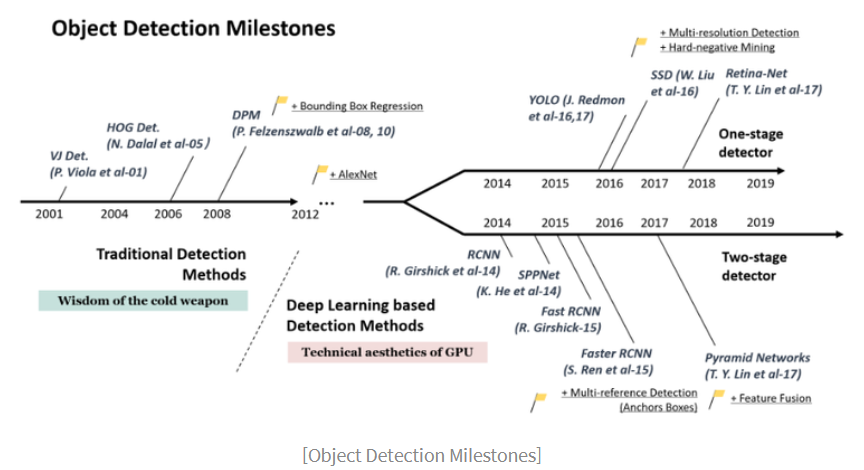

https://arxiv.org/pdf/1905.05055.pdf

아래는 Object Detection과 관련한 복습 내용이다.

 - `Fast Detection Models` -  
 https://lilianweng.github.io/lil-log/2018/12/27/object-detection-part-4.html  


 - `What do we learn from single shot object detectors, FPN & Focal loss?` -  
 https://jonathan-hui.medium.com/what-do-we-learn-from-single-shot-object-detectors-ssd-yolo-fpn-focal-loss-3888677c5f4d  


 - `윗글의 번역본` - https://murra.tistory.com/17
 
 이후는 1-Stage Object Detection 모델을 위주로 Face Detection에 적합한 딥러닝 모델들에 대해 탐색한다. YOLO, SSD, RetinaNet 등 이 분야에 모델의 발전사를 살펴보자.

### 13-3 YOLO (1) : YOLO v1의 등장

#### YOLO : You Only Look Once

https://www.youtube.com/watch?v=NM6lrxy0bxs

CVPR 2016. 2016년도에 CVPR oral session에서 실시간 데모를 했는데 당시 기술 수준을 생각해보면 충격적이었다.

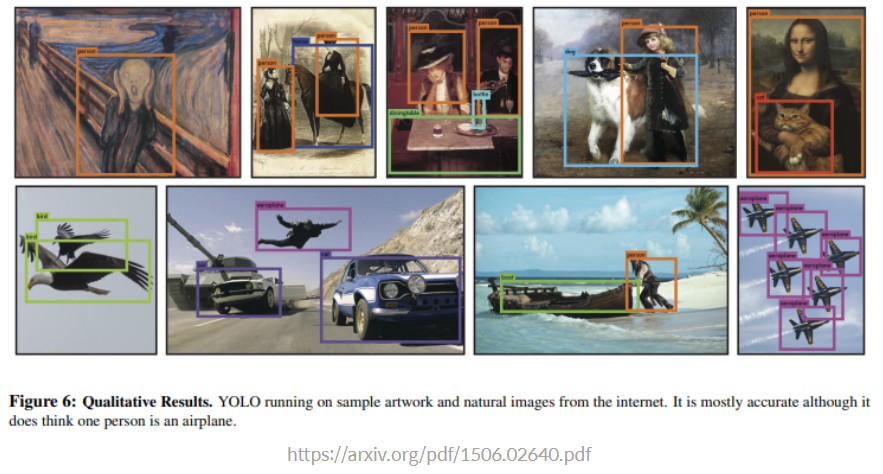



### 13-4 YOLO (2) YOLO v1의 원리

#### YOLO의 특징

1. `YOL Only Look Once`

 - 전체 이미지를 보는 횟수가 1회라는 것을 의미한다. YOLO는 클래스에 대한 정보와 주변 정보까지 한번에 학습하고 처리한다. 따라서 배경 오류가 적고 일반화 성능이 좋다.

2. `Unified`

 - `Localization과 Classification을 동시에 수행`한다. YOLO는 이미지를 신경망에 넣어주기만 하면 바로 detection이 가능하다.

3. `Real-Time`

 - 기본적으로 YOLO 모델은 45FPS(초당 프레임수), 빠른 버전은 150FPS까지 성능을 보인다. (참고로 Fast R-CNN은 0.5FPS, DPM은 30FPS의 성능을 가짐.) 따라서 스트리밍 비디오에서도 실시간으로 객체를 Detection할 수 있다.  
 
 
 - 그 외 Object detection을 회기 문제로 관점을 전환했고, 여러 도메인에서 Object detection이 가능하다는 특징이 있다.



#### RCNN과 YOLO

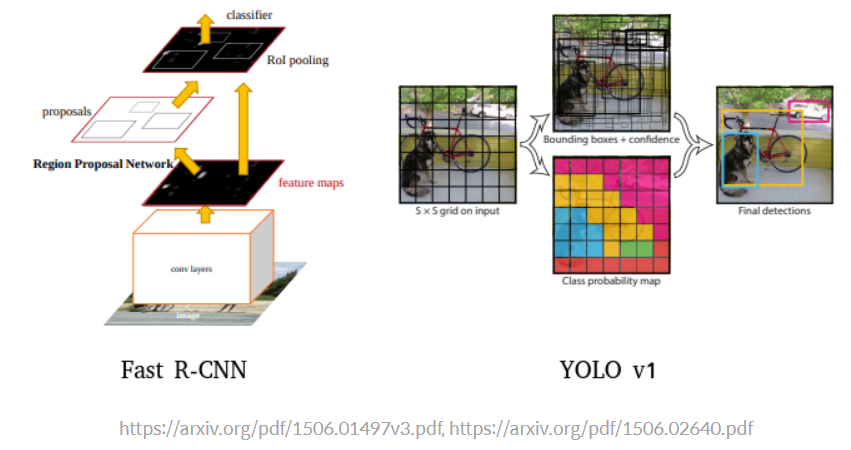

대표적인 2-Stage detector인 RCNN과 1-Stage detector인 YOLO 모델은 기본 가정이 차이 난다.

 - `RCNN 계열의 가정` : 
  - "객체가 존재할 것 같은 곳을 backbone network로 표현할 수 있다" -> Region Proposal Network(RPN)  
  
  
 - `YOLO v1의 가정` : 
  - "이미지 내의 작은 영역을 나누면 그곳에 객체가 있을 수 있다." -> grid 내에 객체가 존재한다.  
  
  
따라서 YOLO v1에서 grid는 고정되고, `각 grid 안에 객체가 있을 확률`이 중요하다.

#### YOLO의 grid cell

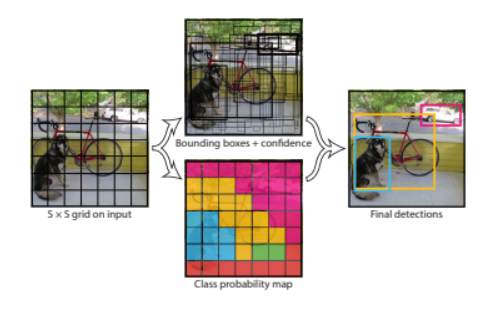

YOLO는 이미지를 S x S grid로 나누고, box regression 단계와 각 클래스마다 probability map을 구하는 단계가 동시에 병렬적으로 수행된다.

`논문에서는` 입력이미지를 7 x 7 grid로 나누고, 각 grid cell마다 예측하는 bounding box(bbox)를 2개, 총 클래스의 수는 20으로 정했다.

각 grid cell은 bounding box(bbox)와 C개의 class 확률을 예측한다.

`각 bounding box(bbox, B)`는 x, y, w, h, confidence score를 예측한다. x, y는 bbox의 중심 좌표이고 w와 h는 너비와 높이이다. 주의할 점은 w와 h는 입력 이미지를 bbox의 너비와 높이를 나눠 normalize한 값으로, `0과 1 사이의 값을 가진다`는 것이다.

confidence score는 box가 객체를 포함하고 있는지 모델이 얼마나 자신 있는지, 박스가 예측하는 것이 얼마나 정확한지 보여준다. 아래 식으로 나타낸다.

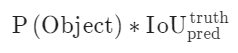

만약 grid cell이 객체를 포함하지 않으면 P(Object)이 0이므로 confidence score는 0이다. grid cell이 객체를 정확히 포함하고 있다면 P(Object)는 1이므로 결국 IoU만 남는다. 따라서 confidence score가 예측된 box와 ground truth box 사이의 IoU와 같도록 하는 것이 좋다.

C개의 조건부 클래스 확률 P(Class(i)|Object)는 grid cell이 사물을 포함할 때 bbox 안의 객체가 i번째 클래스에 속할 확률이다. bounding box의 개수와 상관 없이 각 grid cell의 확률만 예측한다.

위 내용을 정리하면 하나의 grid cell에 대해 아래와 같은 tensor가 나온다.

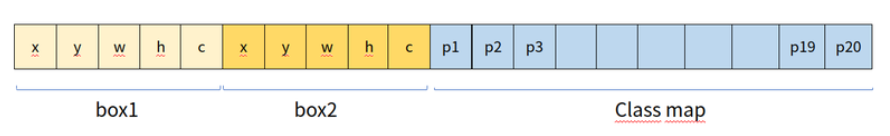

위 이미지에서 보면 자전거를 포함하는 grid가 많다. 이럴 경우 학습이 잘된 경우는 해당 grid들이 모두 비슷한 크기로 자전거의 bbox를 잡는다. 여기서 동일한 객체를 잡는 bbox가 많아진다는 문제가 생긴다.

이때 `NMS(Non-Maximum Suppression)`와 같은 기법을 이용한다. 비-최대 억제라고 불리는 NMS 기법은 object detector가 예측한 여러 개의 bounding box 중 정확한 bounding box만을 선택하는 기법이다.

`NMS 알고리즘`은 아래와 같다.

1. 하나의 클래스에 대한 높은 confidence score 순서대로 bbox를 정렬한다. confidence score가 특정 threshold를 넘지 않는 것은 제거한다.  


2. 가장 높은 Confidence Score의 bbox와 겹치는 다른 bbox를 비교해 IoU가 threshold보다 높으면 겹치는 bbox를 목록에서 제거한다. 두 bbox의 IoU가 높다는 것은 같은 객체를 detect하고 있다는 의미다.  


3. 1과 2의 과정을 반복해서 마지막으로 남은 bbox를 반환한다.  


4. 각 클래스에 대해 위 과정을 반복한다.  


NMS 알고리즘을 적용하면 아래 그림과 같이 겹쳐 있는 bounding box 중 정확한 bounding box만 표시한다.

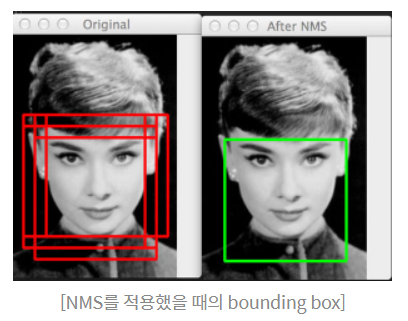
https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/

`YOLO의 목표는 grid에 포함되는 객체를 잘 잡아내는 것`이다. 즉, grid cell에 속하는 객체를 검출할 책임이 있다. 따라서 1개 grid에 귀속된 bbox 정보(x, y, w, h)의 학습 목표는 bbox의 ground truth와 최대한 동일하도록 학습되는 것이다. 학습 목표가 제대로 이루어졌는지 확인하려면 객체 인식 모델의 성능 평가 도구인 IoU(Intersection over Union)을 사용하면 된다.

- IoU, Intersection over Union 개념을 이해하자 - https://ballentain.tistory.com/12


#### YOLO의 네트워크 구조

24개의 Conv 레이어와 2개의 Fully connected layer로 이루어져 있다.

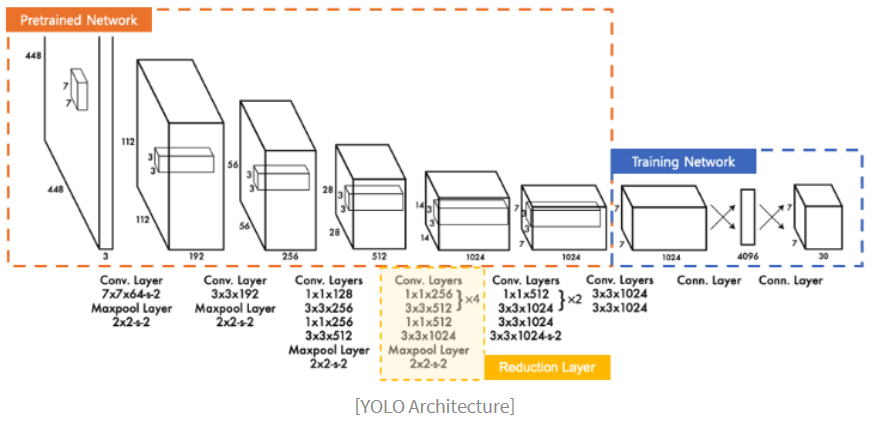
https://medium.com/curg/you-only-look-once-%EB%8B%A4-%EB%8B%A8%EC%A7%80-%ED%95%9C-%EB%B2%88%EB%A7%8C-%EB%B3%B4%EC%95%98%EC%9D%84-%EB%BF%90%EC%9D%B4%EB%9D%BC%EA%B5%AC-bddc8e6238e2

모델 구조의 앞부분(Pretrained)은 ImageNet의 1000개 클래스 데이터셋을 가지고 사전 학습한 GoogleNet 모델이다. 사전 학습을 위해 20개의 Conv 레이어와 average pooling 레이어와 fully-connected 레이어를 사용했다. 그러나 GoogleNet의 Inception 모듈 대신 1x1 reduction 레이어를 사용하여 연산량을 감소시켰다.

detection을 위해 사전 학습된 모델에 4개의 Conv 레이어와 2개 FC 레이어를 추가했고, PASCAL VOC 데이터셋으로 fine-tunning 했다. fine-grained 이미지를 얻기 위해 원래 224x224 이미지의 2배인 448 x 448의 이미지를 사용했다.

마지막 레이어는 Class 확률과 bbox 좌표를 학습하고 예측해 S x S x (B * 5 + C) 크기의 텐서로 예측값이 출력된다.

#### YOLO의 Inference 과정

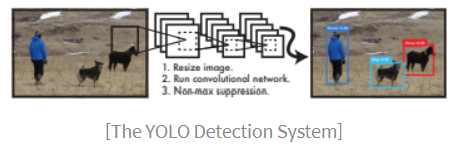
https://arxiv.org/pdf/1506.02640.pdf

Inference 할 때는 조건부 클래스 확률 P(Class(i)|Object)를 각 box의 confidence 예측값과 곱해 각 box의 클래스별 confidence score(class-specific confidence score)를 얻을 수 있다. 각 score는 box의 클래스의 확률과 예측된 box가 사물을 얼마나 잘 예측하는지 보여준다.

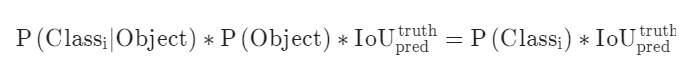

이 과정을 모든 bbox에 시행하면 한 이미지에서 예측한 클래스별 confidence score의 개수는 7 * 7 * 2 = 98개이다. 이 98개 클래스별 confidence score에 대해 20개의 class를 기준으로 NMS를 하여 object에 대한 class와 bounding box location을 결정할 수 있다.



### 13-5 YOLO (3) YOLO v1의 성능

#### YOLO v1의 loss 함수

YOLO의 loss는 bbox의 위치 예측과 관련된 `localization loss`와 클래스 예측과 관련된 `classification loss`가 있고, 두 loss 모두 `SSE(sum-squared error)`를 기반으로 한다. SSE는 두 loss를 동일하게 가중치를 준다. 하지만 이런 상황은 이상적이지 못하다. 

뿐만 아니라 이미지 내 대부분의 grid cell에 객체가 없을 경우가 일반적인데, 이런 경우 confidence score가 0에 가깝게 된다. 이는 모델의 불균형을 초래한다.

이런 문제를 해결하기 위해 bbox의 좌표에 대한 loss를 증가시키고, 객체가 없는 box의 confidence 예측값의 loss는 감소시켰다. 이를 위해 `lambda(coord)`와 `lambda(noobj)`라는 두 개의 하이퍼파라미터를 사용했다.

뿐만 아니라 SSE는 큰 bbox와 작은 bbox의 loss를 모두 동일한 가중치로 계산한다. 그러나 작은 bbox가 큰 bbox보다 조그마한 위치 변화에 더 민감하게 반응한다. 이를 개선하기 위해 `bbox의 너비와 높이에 square root`를 취했다. 

YOLO의 loss 함수 식은 아래와 같다.

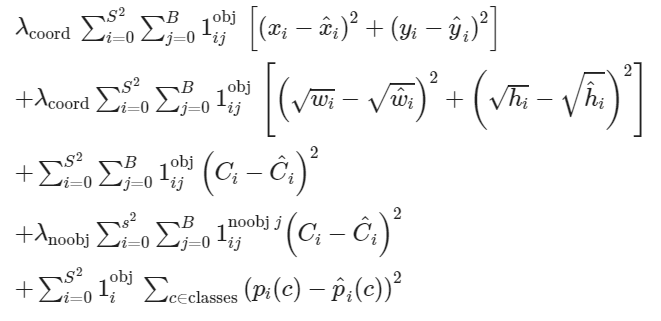

 - 1(i, obj)는 grid cell i 안에 객체가 있는지 여부를 나타낸다. 객체가 grid cell 안에 존재하면 1, 없으면 0을 출력한다.  
 
 
 - 1(ij, obj)는 객체가 존재하는 grid cell i의 j번째 bbox predictor이고, i번째 cell에 객체가 있고, j번째 predictor의 값이 다른 predictor보다 높으면 1, 그렇지 않으면 0으로 출력한다.  
 
 
 - 1(ij, noobj)는 객체가 존재하지 않는 grid cell의 j번째 bbox predictor를 의미한다.  
 
 
loss 함수를 하나씩 살펴보면 아래와 같다.

 - 첫번째 항 ~ 세번째 항 : 객체가 존재하는 grid cell i의 bbox predictor j에 대해 
 
  - 첫번째 항 : x와 y의 loss 계산  
  
  - 두번째 항 : 너비와 높이의 loss 계산 (제곱근을 취한 SSE)  
  
  - 세번째 항 : confidence score의 loss 계산  
  
  
 - 네번째 항 : 객체가 존재하지 않는 grid cell i의 bbox predictor j에 대해 confidence score의 loss 계산 (객체가 없을 때의 패널티)  
 
 
 - 다섯번째 항 : 객체가 존재하는 grid cell i에 대해 조건부 클래스 확률의 loss 계산  
 
 
#### YOLO의 성능

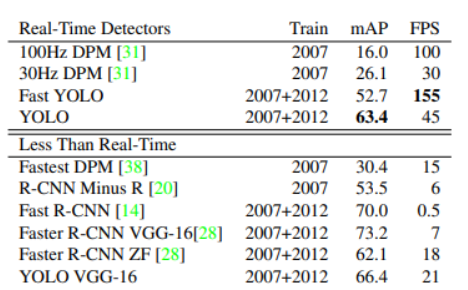

https://arxiv.org/pdf/1506.02640.pdf

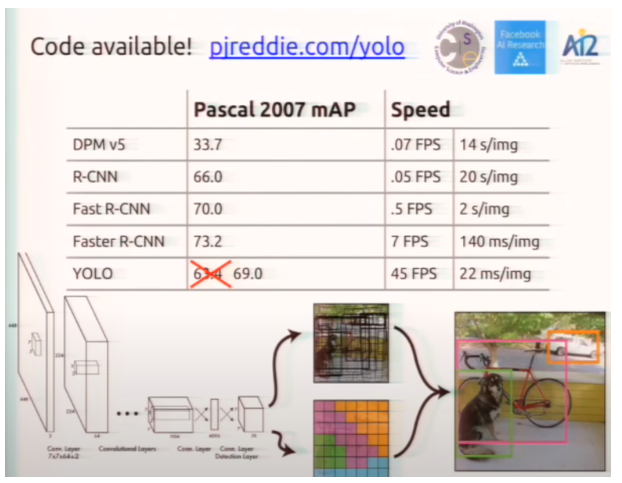

https://www.youtube.com/watch?v=NM6lrxy0bxs&t=142s

arXiv 논문 발표에서 mAP가 63.4였지만 CVPR 2016 발표때는 69.0으로 모데르이 성능을 향상되어 발표했다. 즉, YOLO v1은 Faster R-CNN과 성능에 큰 차이가 나지 않으면서 속도는 6배 이상인 혁신적인 연구였다.


#### YOLO v1의 단점

각각 grid cell이 2개의 box와 하나의 클래스만 예측 가능하기 때문에 가까이에 있는 여러 개의 객체를 예측하기 어려웠다. 특히 새떼와 같이 그룹으로 나타나는 작은 object에 대해 예측을 제대로 하지 못했다.

또, bbox의 형태가 training data를 통해 학습되었기 때문에 bbox 분산이 너무 넓어 새로운 형태의 bbox 예측이 잘 안되기도 했다. 모델 구조상 backbone만 거친 feature map을 대상으로 bbox 정보를 예측하기 때문에 localization이 다소 부정확했다.

마지막으로 loss 함수가 작은 bbox와 큰 bbox의 loss를 같게 다루기 때문에 큰 box의 작은 loss보다 작은 box의 작은 loss가 IoU에 더 큰 영향을 미쳤다. 그래서 2017년 YOLO v2가 나오게 된다.

### 13-6 YOLO (4) YOLO v2

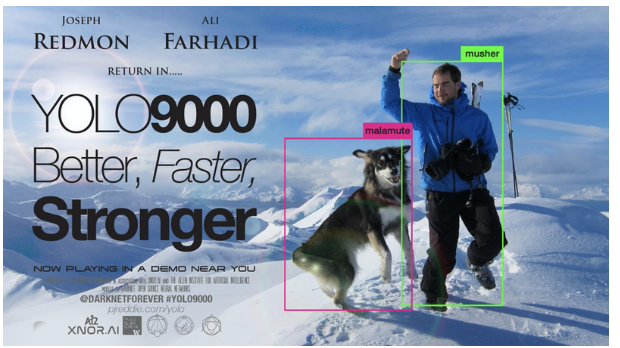

Object Detection에 혁신을 가져온 Redmon이 1년 뒤인 2017년 CVPR 2017에 YOLO v2로 발전시켜 나오게된다. 위 이미지는 실제 발표 자료에 포함된 것이다.

Joseph Redmon의 발표자료에서 intro에서 YOLO 자체로 좋긴 좋았지만 정확도가 아쉬웠다고 했다. 

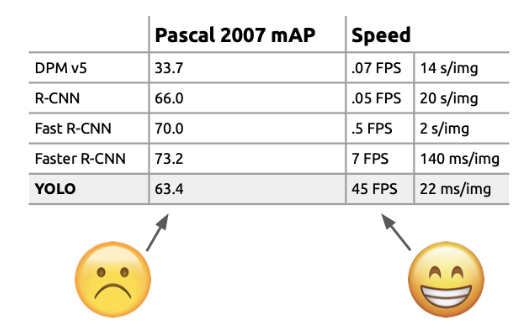

### YOLO v2의 목적

 - `Make it better`  
 
 
 - `Do it faster`  
 
 
 - `Makes us stronger`  
 
 
간단히 요약하면 `recall을 올리고 localization을 잘 해보자.`이다.

### Make it better

Better는 `정확도를 올리기 위한 방법`이다. YOLO v2에서는 이전 모델에서 낮은 성능으로 보였던 localization과 recall을 높이면서 여전히 모델을 단순하게 만들고 속도를 빠르게 하려고 했다.

이를 위해 `Batch Normalization`, `High Resolution Classifier`, `Convolutional with Anchor boxes`, `Dimension Clusters`, `Direct location prediction`, `Fine-Grained Features`, `Multi-Scale Training` 등의 방법을 사용했다. 각 방법을 사용했을 때의 결과는 아래 표로 정리되어 있다.

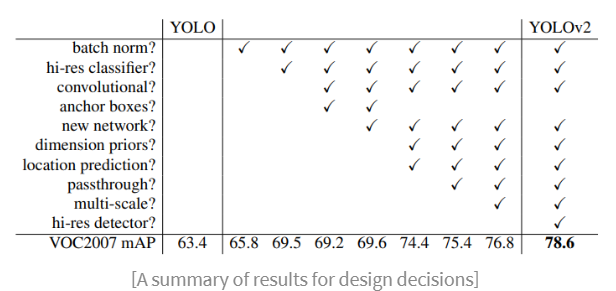

https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf

정확도를 높이기 위해 사용했던 각각의 방법을 간단히 정리하면 아래와 같다.

### Batch Normalization

모든 conv 레이어에 batch normalization을 사용했고, dropout은 제거했다. 이로써 mAP에서 2% 이상 성능을 개선했다.

### High Resolution Classifier

YOLO v1에서 ImageNet의 224 x 224 이미지를 학습하고, detection에서 448 x 448 이미지를 사용했던 것과 다르게 YOLO v2에서는 처음부터 448 x 448의 해상도로 학습했다. 이로써 mAP에서 4% 정도 성능 개선을 이루었다.

### Convolutional With Anchor Boxes

bounding box를 예측하기 위해 YOLO v1의 Fully connected 레이어를 제거한 후 Fully Convolutional Network를 사용했고, anchor box들을 사용해 bounding box를 예측했다.

또한 1개의 중앙점을 갖는 13 x 13 (홀수 x 홀수)의 출력 feature map을 만들도록 입력 이미지의 크기를 448 x 448에서 416 x 416로 줄였다. 이는 대부분의 객체가 이미지의 중앙에 있는데, 중앙에 위치한 객체의 경우 중앙점이 하나이 경우에 더 잘 예측할 것이라는 예상 때문이다.

따라서 YOLO v2는 13 * 13 * 5개의 bounding box를 예측한다.

그 결과 mAP는 69.5에서 69.2로 떨어졌지만 recall은 81% -> 88% 로 증가했다.

### Dimension Cluster

Fast R-CNN에서 anchor box의 크기와 비율을 사전에 정해주고, 학습을 통해 세부 조정을 했다. 그러나 YOLO v2는 k-means clustering을 적용해 최적의 anchor box를 결정했다.

하지만 유클리드 거리를 사용하는 일반적인 k-means clustering과 달리 IoU 개념을 distance metric으로 사용해 더 좋은 anchor box를 얻을 수 있었다. 그 이유는 ground truth box와 유사한, 즉 IoU가 높은 anchor box를 찾기 위해서였다.

클러스터링 개수를 늘리면 정확도가 높아지지만 속도가 느려지기 때문에 YOLO v2는 최종적으로 5개의 anchor box를 사용했다.

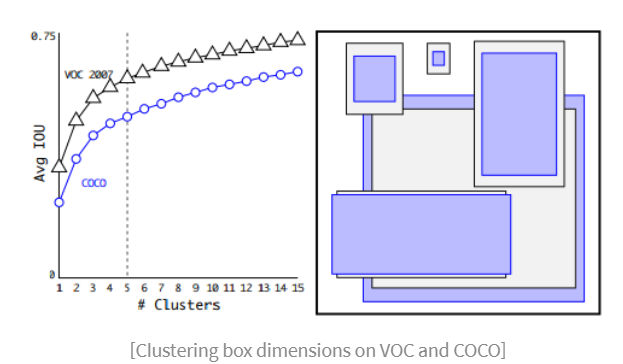

https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf

### Direct location prediction

YOLO v2는 결정한 anchor box에 따라 하나의 셀에서 5차원의 벡터로 이루어진 bounding box를 아래와 같은 방식을 조정하여 예측했다. 학습 초반에 random initialization으로 인한 학습의 불안정을 예방하기 위해 bounding box가 grid cell을 벗어나지 않도록 제약을 뒀다. 주의할 점은 YOLO v1이 grid cell의 중앙점을 예측했다면 YOLO v2는 좌상단으로부터 얼마나 이동했는지 예측한다는 것이다.

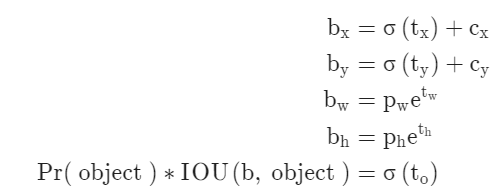

(P(w), P(h): 앵커 박스 사이즈, t(x), t(y), t(w), t(h) : 모델의 예측 offset 값, b(x), b(y), b(w), b(h) : 예측 bounding box의 좌표, 너비, 높이)

Dimension Cluster와 Direct location prediction을 사용해 약 5% 성능 향상을 얻었다.

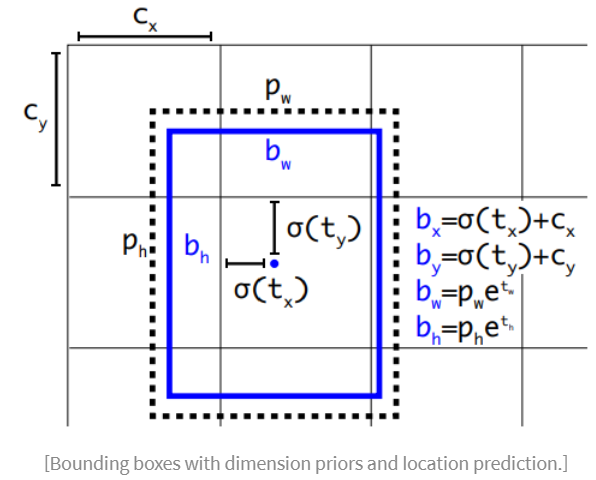

https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf

### Fine-Grained Features

13 x 13의 feature map은 작은 물체 검출을 잘 하지 못한다는 단점이 있었기 때문에 `YOLO v2는 passingthrough 레이어라는 것을 사용`했다. passingthrough 레이어는 이전 레이어의 26 x 26 feature map과 13 x 13의 feature map을 concatenate한다. 이렇게 하는 이유는 26 x 26의 feature map에 Fine-Grained Features(고해상도 피처)가 담겨 있기 때문이다.

그러나 두 feature map의 크기가 다르기 때문에 26 x 26 x 512 feature map을 13 x 13 x 2048 feature map으로 변환 후 concatenate했다.

이로써 약 1% 성능 향상을 보였다.

### Multi-Scale Training

모델이 다양한 입력 사이즈에도 예측을 잘 할 수 있도록 매 10개의 batch마다 입력 이미지의 크기를 바꿔가며 모델 학습을 했다. 모델이 32 간격으로 downsample 되므로 입력 이미지는 32의 배수가 될 수 있다. 그래서 입력 이미지의 크기는 {320, 352, ... 608} 중 하나가 사용된다.

### Do it faster

faster는 `detection 속도를 향상`시키기 위한 방법이었다.

### Darknet-19

YOLO v2에서는 Fully Connected 레이어를 제거하고 global average pooling을 하여 가중치 파라미터 수를 크게 줄였다. 이렇게 해서 만든 최종 모델은 Darknet-19라고 불리는데, 19개의 convollutional 레이어와 5개의 maxpooling 레이어로 이루어져있다.

DarkNet-19를 통과한 YOLO v2의 최종 출력은 13 x 13 x 125이다. 위에서 feature map이 13 x 13이라고 했고, 5개의 bounding box를 예측하기 때문에 5 * (5 + 20)이므로 13 x 13 x 125가 된다. 이전 스텝에서 하나의 bounding box가 x, y, w, h, confidence를 예측하고, 클래스의 개수가 20라고 했었다. 

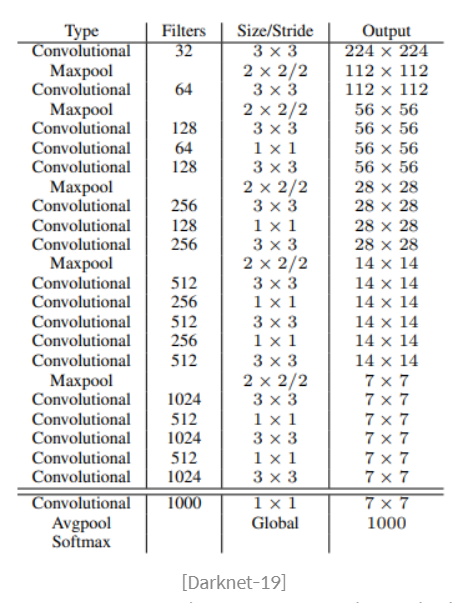

https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf

### Makes us stronger

stronger는 `더 많은 범위의 class를 예측`하기 위한 방법이었다. YOLO v1는 PASCAL VOC 데이터셋에서 제공되는 20개의 클래스를 기준으로 학습해 20개의 클래스만 detection했다. 그러나 YOLO v2에서는 9천개의 클래스에서 detection할 수 있도록 하고, 그 모델을 YOLO9000이라고 불렀다. 그래서인지 YOLO v2는 YOLO9000라는 논문이름으로 발표되었다.
https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf

YOLO 9000은 YOLO v2와 모델 구조가 같고 detection하는 라벨을 늘렸다. 간단히 설명하자면 9천개의 클래스에 대해 분류를 하기 위해 계층적으로 분류 작업(Hierachical Classification)을 수행하여 기존의 WordNet 기반의 데이터를 트리 구조인 WordTree를 생성했다.

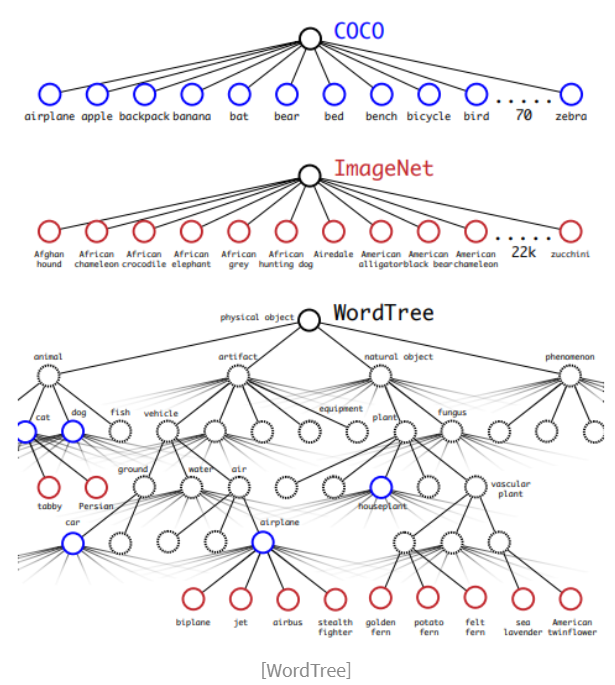

https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf

ImageNet + COCO 데이터셋 + ImageNet Detection을 합쳐 9천개의 클래스 라벨을 생성했다. 그 후 Detection과 Classification 데이터셋의 개수가 차이가 크기 때문에 oversampleing하여 Detection과 Classification 비율을 4:1로 맞췄다. Detection 데이터셋은 classification과 bbox에 대한 loss를 역전파했지만 Classification 데이터셋은 classification loss만 역전파하여 학습했다. 이로 인해 9천개의 클래스를 detection 할 수 있었다.

### YOLO v2의 성능 비교

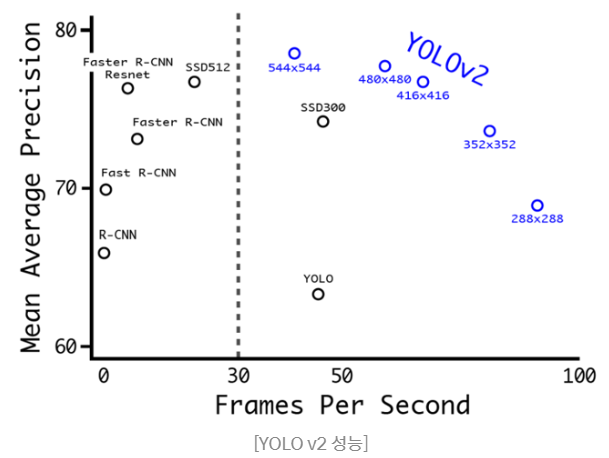

https://medium.com/@akarshzingade/logo-detection-using-yolov2-8cda5a68740e

YOLO v2의 성능은 위 그래프에서도 볼 수 있듯 mAP가 상승하고 FPS도 개선되었다는 것을 알 수 있다. 그러나 여전히 mAP와 FPS 간의 trade-off가 존재했다.

YOLO v2 발표 당시 SSD, R-FCN 등이 이미 발표된 상황이었다. 특히 SSD와 YOLO는 같은 single stage 방법을 지향하고 있었기 때문에 경쟁 모델이 되었고, YOLO v2 입장에서는 SSD와의 성능 차이를 부각시키는게 중요한 과제였다.

아래는 TED의 YOLO v2 데모영상이다.

https://www.youtube.com/watch?v=Cgxsv1riJhI

### 13-7 YOLO (5) YOLO v3

### RatinaNet의 도발

아래 RetinaNet figure를 보면 YOLO v2를 언급하며 이제 퇴물이라는 느낌을 풍기게 했다.

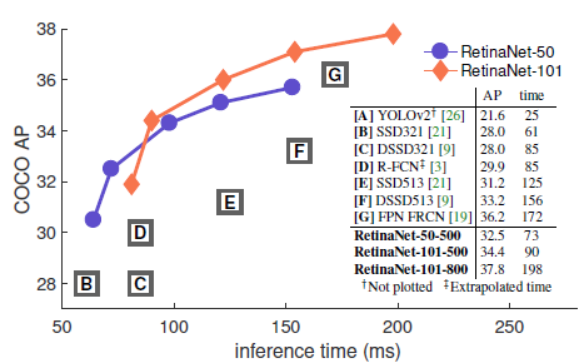

https://arxiv.org/pdf/1708.02002.pdf

하지만 역시 CV의 힙스터 Redmon은 새로운 YOLO를 들고 RetinaNet과 정면 비교했다.

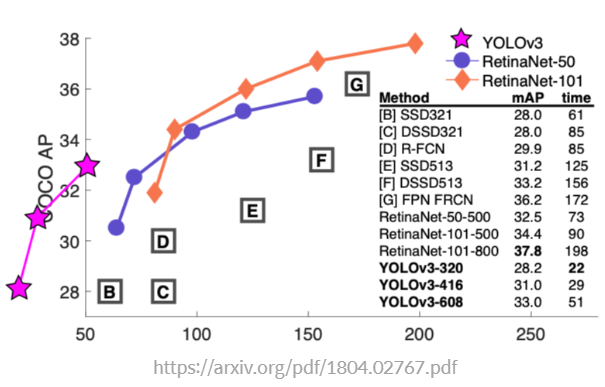

https://arxiv.org/pdf/1804.02767.pdf

RetinaNet figure를 그대로 가지고 와 YOLO v3 성능을 박아 넣었다.

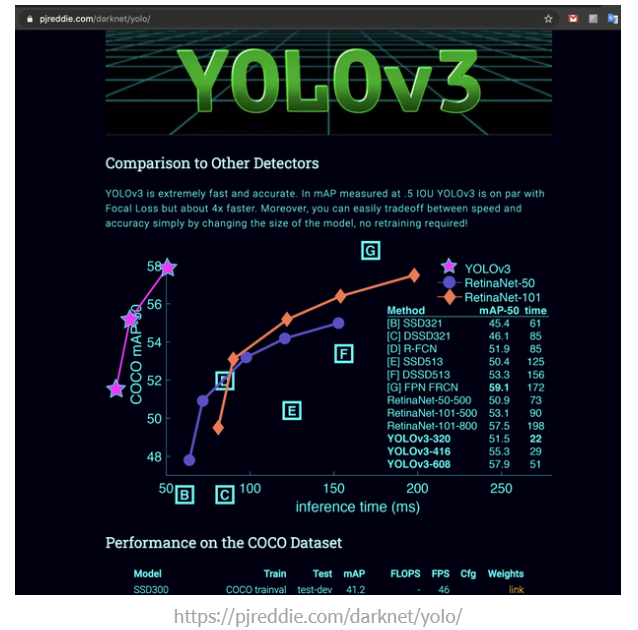

https://pjreddie.com/darknet/yolo/

### YOLO v3 원리

YOLO v3는 YOLO v2보다 속도는 조금 느리지만 정확도를 개선한 모델이다. 특히 YOLO의 약점이었던 작은 물체를 detection할 때 성능을 개선했다.

YOLO v3는 https://arxiv.org/abs/1804.02767 라는 논문을 소개했다. 엄밀히 말하면 논문보다 Tech Report인데, 이전의 YOLO 모델과의 차이점을 간략하게 소개한 보고서이다.

사실 YOLO v3는 YOLO v2에서 약간 변화만 추가한 모델이다. 따라서 YOLO v3 원리는 YOLO v2와 차이점을 중심으로 설명하겠다.

### Bounding Box Prediction

Bounding Box Prediction은 YOLO v2와 거의 차이가 없다. 그러나 각각의 bounding box마다 objectness score, 즉 bounding box에 물체가 있는지 예측하는 점수를 logistic regression을 사용해 예측했다. anchor box와 ground truth box가 IoU가 가장 높은 박스의 objectness score는 1로 두고 나머지는 무시했다. 또한, Faster R-CNN 등의 다른 모델과 달리 각각의 ground truth에 대해 1개의 bounding box만 가지게 된다는 차이가 있었다.

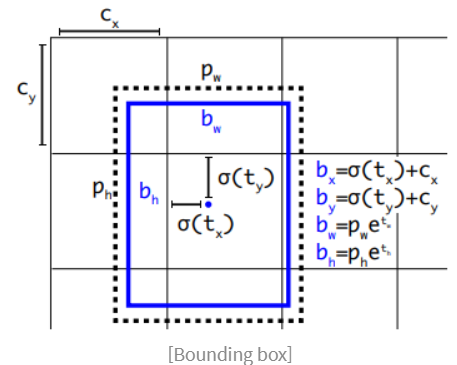

https://arxiv.org/pdf/1804.02767.pdf

### Class prediction

YOLO v3는 하나의 이미지에 다양한 label을 붙일 수 있는 multilabel classification를 하였다. 예를 들어 여성의 이미지에 person과 woman이라는 두 가지의 label을 붙일 수 있는 것을 의미한다. 이를 위해 여러 개 중 하나만 찾는 softmax classifier가 아닌 해당 label이 맞는지 아닌지 판단하는 logisstic classifier를 사용했고, binary cross entropy를 사용해 loss를 계산했다.

### Predictions Across Scales

YOLO v3는 3개의 scale로 bounding box를 예측했고, 각 scale당 3개의 bounding box를 예측했다. 따라서 총 9개의 bounding box가 나오게 되고, 텐서는 N x N x [3 * (4 + 1 + 80)]이다. 여기서 3은 anchor box의 수이고, 4는 bounding box의 좌표, 너비, 높이이며, 1은 objectness score, 그리고 80은 클래스의 수이다.

또한 feature map을 2배씩 upsampling함(13, 26, 52)으로써 더 의미 있는 semantic information을 얻고, 이전 feature map과 concatenate하여 보다 fine-grained한 정보를 얻을 수 있었다고 한다.

### DarkNet-53

성능을 높이기 위해 YOLO v3은 53개의 레이어를 사용했다. YOLO v2의 아키텍처였던 DarkNet-19에 residual network를 넣어 레이어를 최대 53개까지 쌓을 수 있었다.

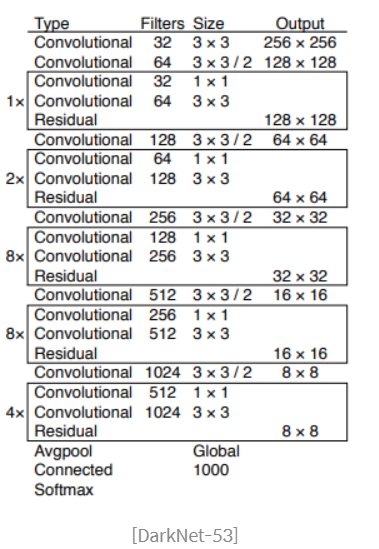

https://arxiv.org/pdf/1804.02767.pdf

DarkNet-53은 DarkNet-19보다 정확도가 높았고, ResNet-101이나 ResNet152와 성능이 비슷하지만 연산면에서 효율적이었다.

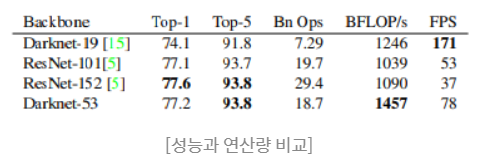

https://arxiv.org/pdf/1804.02767.pdf

전체 모델 구조는 아래 이미지로 나타낼 수 있다. 입력 이미지를 DarkNet-53에 통과시켜 downsampling하면서 feature map을 추출한다. 이 feature map을 토대로 detection을 하고, upsampling 후 다시 detection하고 다시 upsampling을 한 후에 detection하게 된다. 즉 3개의 scale된 bounding box를 이용한 detection을 함으로써 여러 개의 label에 대해서도 classification을 할 수 있었다.

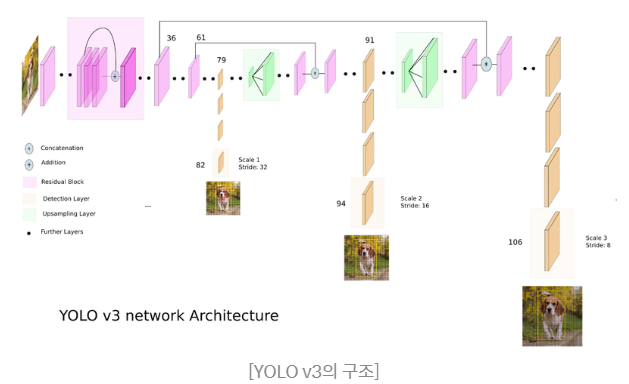

https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b



### 13-8 YOLO v3 그 이후

Redmon은 Computer Vision 연구가 자신의 목적과 다르게 군사적으로 사용되고 있는 것에 큰 회의감을 느끼고 CV 연구를 그만두겠다고 선언했다. YOLO 등 DarkNet 프로젝트는 Alexey Bochkovskiy가 메인테이너로 이어 받게 된다. 그 이후에도 다양한 사람들에 의해 YOLO를 이용한 다양한 모델이 나왔다.

### YOLO v4

Redmon이 빠진 후 Alexey Bochkovskiy가 2020년 4월에 YOLO v4를 발표했다. 아래 그림과 같이 YOLO v3보다 AP와 FPS가 각각 10%, 12% 증가된 것을 볼 수 있다.

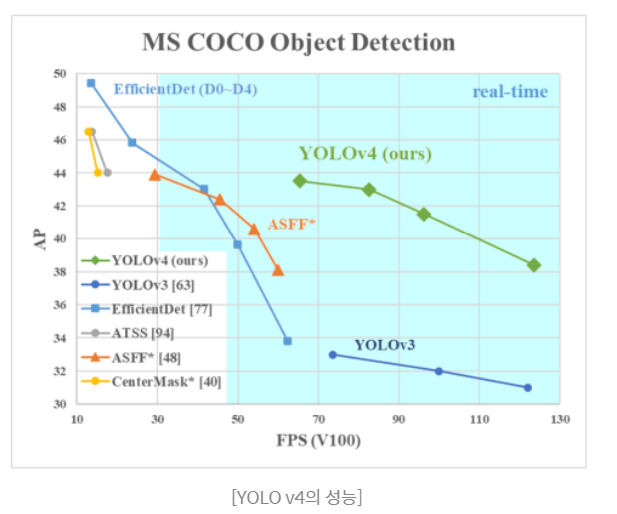

https://arxiv.org/pdf/2004.10934.pdf

YOLO v4를 간단히 설명하자면 YOLO v3에 다양한 기법을 사용해 하나의 GPU(1080 Ti 또는 2080 Ti)로 object detection을 실시간으로 할 수 있도록 만든 모델이다. 논문에서도 다양한 기법을 소개하고, 그 기법들을 실험한 결과를 정리하여 YOLO v4를 아래와 같이 나타낼 수 있다. 백본으로는 CSPDarkNet53을 사용했고, Neck(feature map 정제 및 재구성)으로는 SPP와 PAN, Head(object classification, localization)에서는 YOLO v3를 사용한 것이다.

```
YOLO v4 = YOLO v3 + CSPDarkNet53 + SPP + PAN(Path Aggregation Network) + BoF(Bag of Freebies) + Bos(Bag of Specials)
```

참고로 Bag of Freebies는 Inference cost의 변화 없이 성능을 향상시키는 방법으로 전처리 또는 학습 단계에서 사용된다. Data Augmentation, Regularization, Loss Function 등이 이 기법에 속한다. Bag of Specials는 inference cost가 조금 상승하면서 성능을 향상시키는 방법으로, Inference 단계나 후처리 단계에서 사용된다. Enhance Receptive field, Feature Integration, Activation function, Attention Module, Normalization, Post Processing 등이 해당된다.

각각의 자세한 내용은 논문 https://arxiv.org/pdf/2004.10934.pdf 을 참고해보자.

### YOLO v5

YOLO v5는 2020년 6월에 YOLO v3를 PyTorch로 구현한 Glenn Jocher에 의해 발표되었다. 하지만 YOLO v5는 처음으로 논문과 함께 발표되지 않은 최초의 모델이자, DarkNet이 아닌 PyTorch로의 구현이므로 기존의 YOLO 모델과 많이 다르다는 이유로, YOLO v5라는 이름에 대해 논란이 있었던 모델이다. YOLO v5의 코드는 Ultralytics LLC라는 회사의 깃헙에 공개되어 있다.
https://github.com/ultralytics/yolov5

YOLO v4와 성능은 비슷하지만 용량이 훨씬 작고 속도도 빠르다.

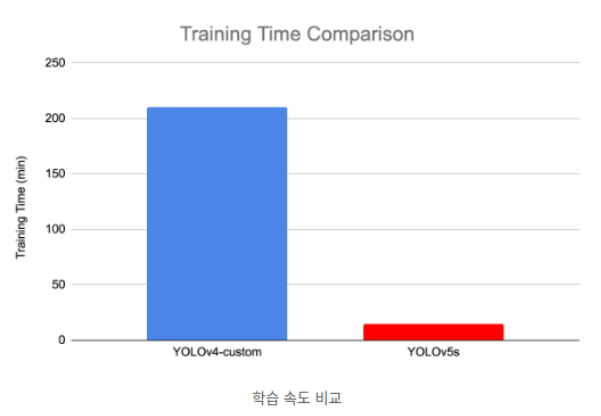

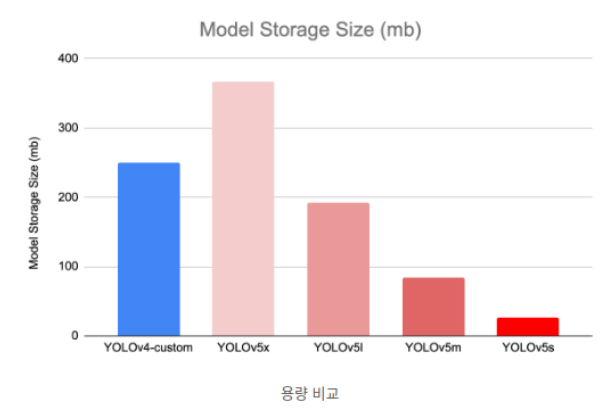

https://yong0810.tistory.com/30

YOLO v5는 OLOv5s, YOLOv5m, YOLOv5l, YOLOv5x라는 이름의 4가지 버전이 있다. 각각 small, medium, large, xlarge로, 백본이나 head는 동일하지만 모델 깊이와 레이어의 채널 수가 다르다. YOLOv5s는 (0.33, 0.50), YOLOv5x는 (1.33, 1.25)의 비율이고, 그에 따른 성능은 아래와 같이 s가 가장 빠르고, 정확도는 x가 가장 높다.

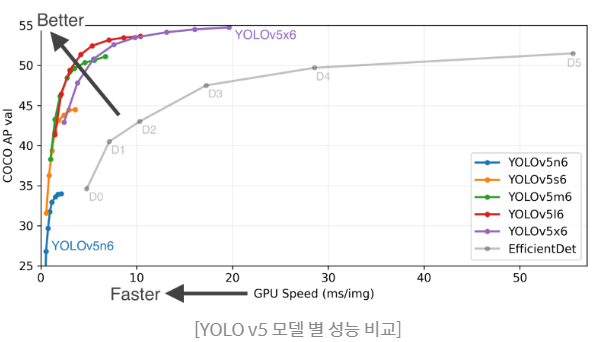

https://github.com/ultralytics/yolov5

YOLO v5는 YOLO v4의 백본과 유사하게 CSP-DarkNet을 사용하고, YOLO v3와 동일하게 3가지 scale에서 bounding box를 각각 3개씩 찾는다. YOLO v5의 아키텍처에 대한 자세한 설명은 아래의 블로그를 참고한다.

YOLO V5 환경 셋팅 및 모델 아키텍쳐 분석하기 - 
https://ropiens.tistory.com/44

### PPYOLO

PPYOLO는 2020년 8월 바이두에서 발표된 모델로, PP라는 것은 바이두에서 만든 오픈소스 딥러닝 전용 프레임워크 PaddlePaddle의 약자이다. 즉 PPYOLO는 PaddlePaddle을 이용해 구현한 YOLO 계열의 모델이다. PPYOLO를 소개한 논문 https://arxiv.org/pdf/2007.12099.pdf 은 YOLO v4와 비슷하게, 좋다고 알려진 다양한 기법을 사용해 YOLO v3의 성능을 올린 과정을 소개한 논문이다.

그러나 YOLO v4와 달리 백본 네트워크, Data augmentation, NAS 등은 사용하지 않았는데, 그 이유는 일반적인 방법을 사용해 YOLO v3의 성능을 올리기 위해서라고 한다. 만약 YOLO v4에서 사용한 기법을 사용하면 PPYOLO의 성능은 더 좋아질 것이라고 한다.

PPYOLO의 기본 구조는 YOLO v3와 거의 동일하다. 다만 다른 것은 백본을 DarkNet-53 대신 ResNet-50-vd를 사용한 것과 Inject Points 3가지가 추가로 적용된다는 것이다.

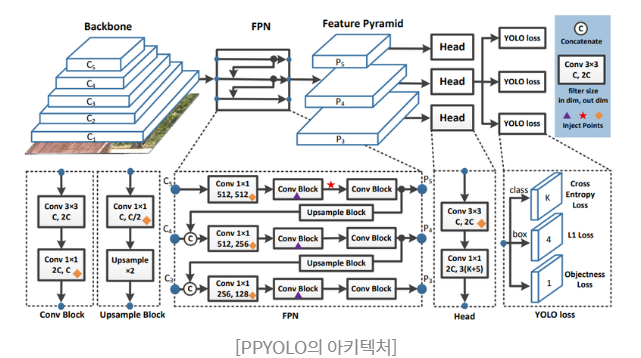

https://arxiv.org/pdf/2007.12099.pdf

PPYOLO에서는 YOLO v4와 비슷하게 Larger Batch Size, EMA, DropBlock Regularization, SPP 등 다양한 방법을 사용해 실험을 했는데 자세한 내용은 논문을 참고한다.

PPYOLO의 성능은 YOLO v4보다 정확도와 속도가 높다.

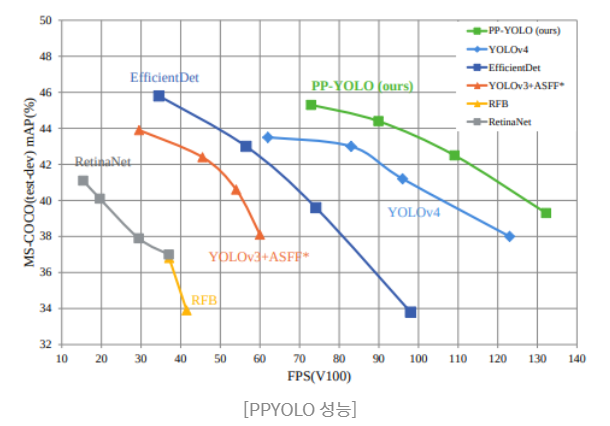

https://arxiv.org/pdf/2007.12099.pdf

### Scaled YOLO v4

2020년 11월, YOLO v4에 scaling 기술을 적용한 Scaled YOLO v4가 공개되었다. Scaled YOLO v4는 다양한 디바이스 환경에서 실시간으로 객체를 탐색하면서도 높은 정확도를 갖출 수 있도록 모델에 scaling 기술을 YOLO v4에 적용하였다. YOLO v4 -> YOLO v4-CSP -> Scaled YOLO v4의 순서로 모델을 만들었다고 한다. YOLO v4에 CSP를 적용한 이유는 기존 모델에 CSPNet을 적용하면 FLOPs(FLoating point Operations Per Second)을 현저히 줄일 수 있기 때문이다. 또한 모델의 scaling의 상한과 하한을 정해 YOLOv4-large와 YOLOv4-tiny model을 만들었다.

아래 그림은 YOLO v4-large의 아키텍처이다. 먼저 CSP를 완전히 적용한 YOLOv4-P5를 디자인한 후, 이를 스케일링 업하여 -P6, -P7 버전을 만들었다고 한다.

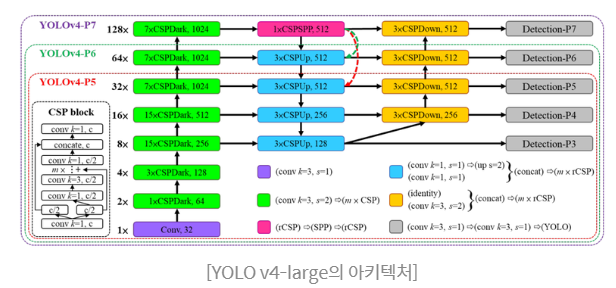

https://arxiv.org/pdf/2011.08036.pdf

Scaled YOLO v4는 발표 당시 기존의 object detection 분야에서 가장 좋은 성능을 가지고 있었다. Scaled YOLO v4에 대한 자세한 내용은 논문 https://arxiv.org/pdf/2011.08036.pdf 을 참고해라.

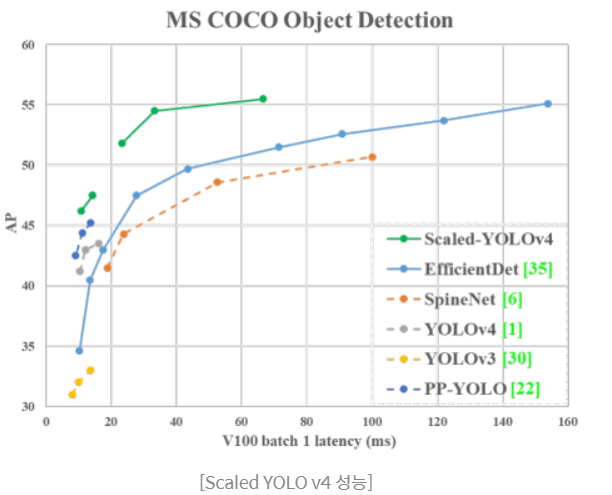

https://arxiv.org/pdf/2011.08036.pdf

### PPYOLO v2

2021년 4월 PPYOLO의 업그레이드된 모델인 PPYOLO v2가 공개되었다. PPYOLO v2의 성능과 정확도는 당시 다른 모델보다 좋았다는 것을 아래의 그래프를 통해 알 수 있었다.

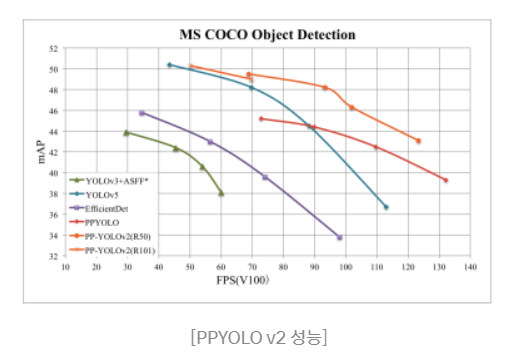

https://arxiv.org/pdf/2007.12099.pdf

PPYOLO v2는 PPYOLO의 성능을 향상시키기 위해 mish 활성화 함수와 Path Aggregating Network 등 다양한 실험을 했다고 한다. 자세한 내용은 논문 https://arxiv.org/pdf/2104.10419.pdf 을 참고한다.

### YOLOR

2021년 5월에 YOLOR이 논문 https://arxiv.org/pdf/2105.04206.pdf 에서 소개되었다. YOLOR은 Scaled YOLO v4에서 파생된 모델로 같은 저자에 의해 쓰여졌다.

YOLOR은 사람이 학습할 때 명시적 지식(explicit knowlege)과 암묵적 지식(implicit knowlege)를 사용한다는 것에서 착안되어 만들어진 모델이다. 참고로 명시적 지식은 말과 글로 표현할 수 있는 지식이고, 암묵적 지식은 문자나 언어가 아닌 경험이나 학습에 의해 체득된 지식이다. YOLOR은 사람의 일반적인 학습 과정을 딥러닝에 적용하여 general representation을 생성하는 통합된 네트워크를 구성하였다. 이로써 YOLOR은 멀티 태스크를 잘 수행할 수 있었다.

YOLOR의 아키텍처는 단순한데, YOLO v4 CSP 모델의 feature alignment, prediction, refinement, multitask에 암묵적 지식을 아래와 같이 더해주는 것이다. 암묵적 지식의 형태나 어떻게 모델에 적용되는지는 논문을 참고해라.

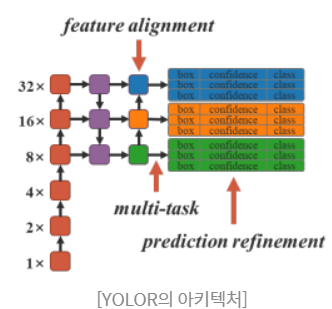

https://arxiv.org/pdf/2105.04206.pdf

### YOLOX

2021년 8월에 나온 https://arxiv.org/pdf/2107.08430.pdf 는 Anchor-Free Detector, Advanced Label Assignment Strategy, End-to-end Detector 등의 최신 연구를 적용하여 YOLO v3 SPP의 성능을 개선했다.

아래 그림은 베이스라인으로 사용한 YOLO v3과의 차이를 나타내고있다. YOLOX는 특히 Decoupled Head, String Data Augmentation, Anchor-Free, Multi-positives를 통해 성능 향상을 꾀하고 있다. Decoupled Head는 prediction 하고자 하는 값에 따라 Head를 나누어 학습 속도를 빠르게 했고, Detector를 End-to-End 방식으로 만들 수 있었다.

Anchor-Free는 ground truth box와 생성된 bounding box 안의 cell이 겹쳐 있으면 positive, 아니면 negative로 지정하여 detection을 수행한다. 이로 인해 연산량을 낮추고, 일반화를 시킬 수 있으며 class imbalance 문제도 해결하고, 정확도를 높일 수 있다고 한다.

그러나 Anchor-Free 방식만으로는 Anchor 메커니즘의 정확도를 따라잡을 수 없었기 때문에 Multi-positives를 사용했다. Multi-positives는 각 객체의 중심과 주변에 해당하는 cell을 positive로 할당하여 예측을 하는 방법으로, 낮은 loss를 가진 k개의 cell만 학습에 참여시키는 simOTA과 함께 사용하여 정확도를 향상시켰다. YOLOX에 대해 더 자세한 내용은 논문을 참고한다.

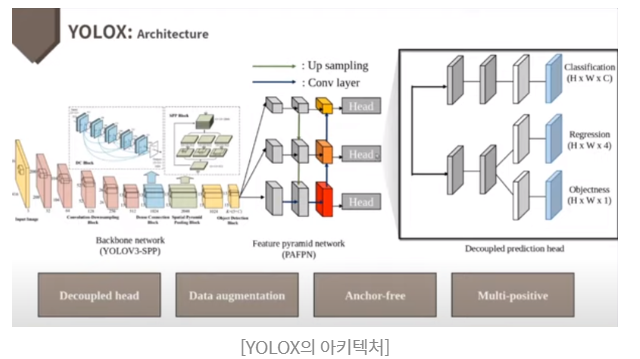

https://www.youtube.com/watch?v=N2rLSzEqqI8

### YOLOS

NLP 분야에서 큰 영향을 끼치고 있는 Transformer는 CV에서도 점차 영향력을 키우고 있다. 이런 흐름에 맞춰 2021년 10월 https://arxiv.org/pdf/2106.00666.pdf 라는 논문에서 YOLOS라는 모델이 소개되었다. 즉, YOLOS는 Transformer Encoder와 NLP Heads만을 사용해 2D object detection을 수행한 모델이다.

YOLOS의 성능은 최근에 나온 다른 YOLO 계열의 모델과 비교했을 때 아주 좋지는 않다. YOLO v3이나 RetinaNet와 비슷한 정도의 성능을 보이고 있다. 하지만 Transformer를 object detection에 적용했다는 점에서 주목해볼 만 하다.

아래 그림은 YOLOS의 모델 구조이다. 간단히 설명하면 YOLOS는 Transformer와 DETR의 Bipartite Loss를 합친 모델이다. 자세한 내용은 논문을 참고한다.

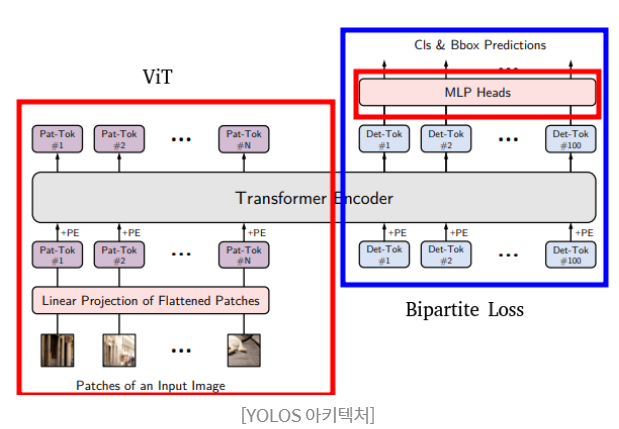

https://arxiv.org/pdf/2106.00666.pdf



### 13-9 SSD (1) SSD의 특징

### SSD : Single Shot MultiBox Detector

YOLO가 1 stage로 object detection을 할 수 있다는 증명을 한 뒤, 1 stage detector는 수많은 발전을 이루었다. SSD는 YOLO v1에서 grid를 사용해서 생기는 단점을 해결할 수 있는 아래와 같은 몇가지 테크닉을 제안했다.

 - Pre-defined Anchor Box  
 
 
 - Image Pyramid
 
이제부터 SSD에 대한 자세한 내용은 논문을 참고하여 설명하겠다.

https://arxiv.org/pdf/1512.02325.pdf

### SSD의 Workflow

YOLO v1의 두번째 단점은 box 정보 (x, y, w, h)를 예측하기 위한 seed 정보가 없기 때문에 넓은 bbox 분포를 모두 학습할 수 없었다는 점이다. 이로 인한 성능 손실이 존재할 수 있다. 따라서,  Faster R-CNN 등 에서 사용하는 anchor를 적용할 필요가 있었다.

만약 개가 등장하는 bounding box가 존재한다면, 그 bounding box만의 x, y, w, h 특성이 존재하기 때문에 pre-defined된 box의 x, y, w, h를 refinement하는 layer를 추가하는 것이 이득이었다. 이 anchor box를 SSD에서는 `Default box`라고 부른다.

### Image Pyramid

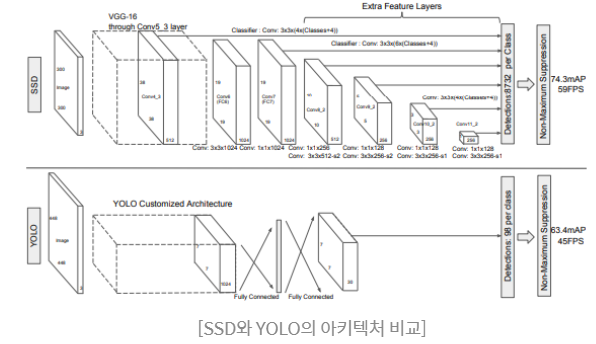

https://arxiv.org/pdf/1512.02325.pdf

Image Pyramid는 ImageNet으로 사전학습된 VGG16을 사용한다.
VGG에서 pooling layer를 거친 block은 하나의 image feature로 사용 가능하다.

YOLO에서 7x7 크기의 feature map 하나만을 사용했다면, SSD는 38 x 38, 19 x 19, 10 x 10, 5 x 5, 3 x 3, 1 x 1인 다양한 크기의 feature map을 사용했다. 각 feature map은 YOLO의 관점에서 보면 원본 이미지에서 grid 크기를 다르게 하는 효과가 있었다. 따라서 5 x 5 크기의 feature map에서 grid가 너무 커서 작은 물체를 못찾는 문제를 38 x 38 크기의 feature map에서 찾을 수 있는 단서를 마련했다.


즉 SSD는 서로 다른 크기의 feature map에서 object detection을 해서 작은 물체는 큰 feature map에서, 큰 물체는 작은 feature map에서 찾을 수 있게 한 것이다. 각 단계에서 추출된 feature map은 detector와 classifier를 통과해 object detection을 한다.

각 feature map에는 bounding box와 클래스 정보가 담겨 있는데, 이 feature map들을 2번 convolution한다. 위의 그림에서 보면 `Classifier: Conv: ...`라고 쓰여있는 부분에서 1번 더 convolution을 하게 된다. 3 x 3 x (default box의 수 x (class의 수 + 4)의 가중치로 convolution을 하여 n x n x (default box의 수 x (class의 수+4))의 feature map을 얻게 된다. 여기서 class는 PASCAL VOC의 클래스 20개와 배경 클래스를 합해 21이고, + 4는 bounding box의 위치 정보 x, y, w, h의 개수를 의미한다.

아래 그림은 위의 그림에서 생략되었던 detector와 classifier를 포함한 아키텍처를 보여준다. 각각의 feature map에서 뽑아낸 6개의 classifier의 예측을 NMS를 사용해 confidence가 가장 높은 box 하나만 남겨 최종 detection을 한다.

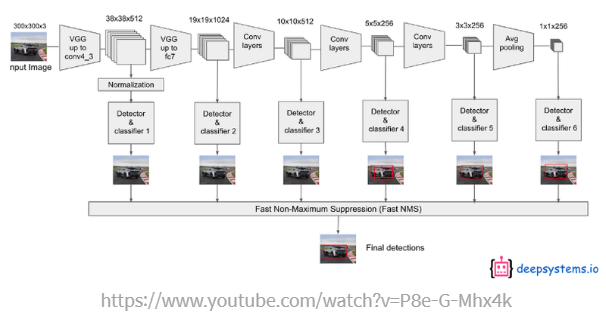

https://www.youtube.com/watch?v=P8e-G-Mhx4k

### SSD의 framework

SSD는 입력 이미지와 각 객체에 대한 ground truth box만을 필요로 한다.  convolution을 할 때 비율이 다른 default box를 설정하는데, 아래의 그림은 다른 크기의 feature map에서, 각 객체마다 다른 비율의 default box를 4개씩 만들어 놓은 것을 표현한 것이다. 각 default box에서 default box와 대응되는 bounding box regression을 적용하여 box의 (x, y, w, h)를 찾고 confidence, 즉 box 안에 물체가 있는지 없는지를 예측하는 점수를 예측한다.

학습할 때 efault box와 ground truth box를 비교해 ground truth box와 비슷한 default box를 선택하여 positive, 나머지는 negative로 설정한다. 양이는 개보다 작기 때문에 8 x 8 feature map에서는 고양이를 잡아내고, 4 x 4 feature map에서는 개를 잡아낸 것을 볼 수 있다. 

이렇게 각 레이어에서 피쳐 맵들을 가져와 Object Detection을 수행한 결과들을 모두 합하여 localization loss와 confidence loss를 구한 다음, 전체 네트워크를 학습시키는 방식으로 1 Step end-to-end Object Detection 모델을 구성하였다.

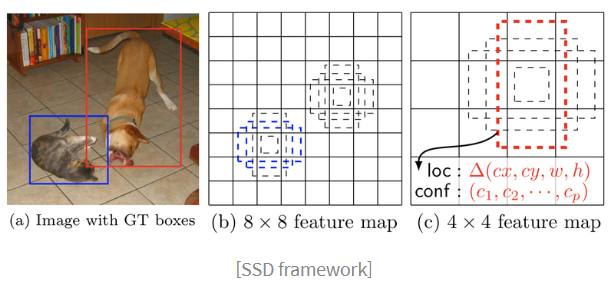

https://arxiv.org/pdf/1512.02325.pdf

### Default box를 위한 scale

다양한 크기의 Default box 생성을 위해 SSD는 아래와 같은 식을 사용한다.

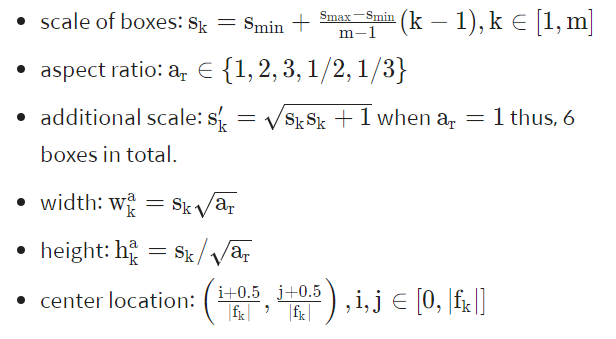

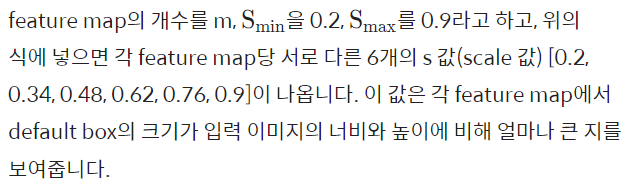

여기서 aspect ratio를 {1, 2, 3, 1/2, 1/3}로 설정하여 default box의 너비와 높이를 구할 수 있다. 예를 들어 k=3이라면 scale은 0.48이며 aspect ration가 2라면 너비는 0.68, 높이는 0.34이다. 논문에서는 1개의 box를 더 추가해 총 6개의 default box의 너비와 높이 값을 구한다.

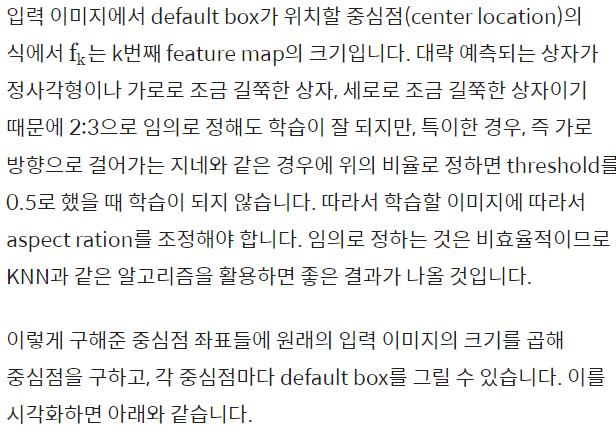

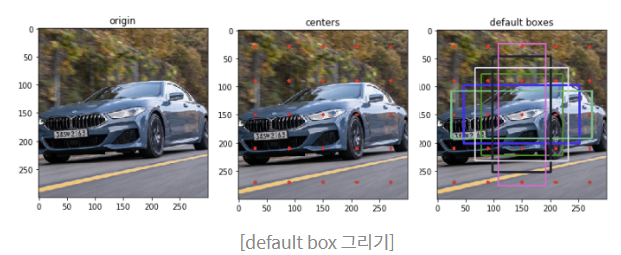

https://yeomko.tistory.com/20

### 13-10 SSD (2) SSD와 Loss와 성능

### Matching strategy

학습 전에 ground truth와 defalt box의 jaccard overlap(IoU)이 0.5 이상인 것을 미리 매칭시켜 positive sample로 설정한다.  jaccard overlap이 0.5 이상인 default box를 모두 사용하면 학습 문제를 단순화시켜서 더 높은 성능을 가져올 수 있다.

 jaccard overlap(IoU) - https://en.wikipedia.org/wiki/Jaccard_index

### SSD Loss function

SSD Loss function의 식은 아래와 같다.

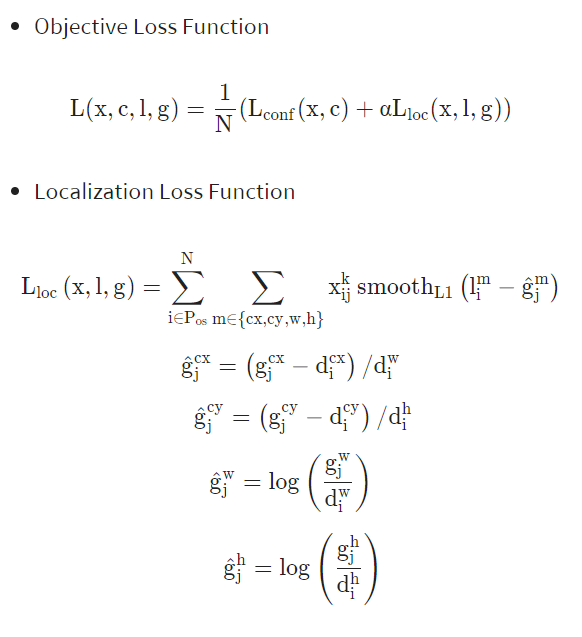

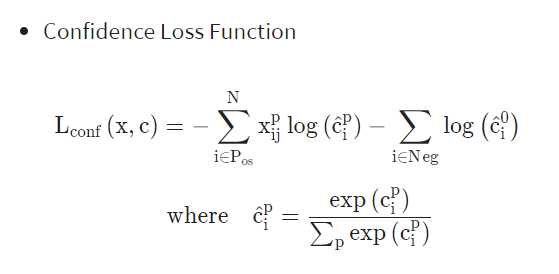

우선 위 식에서 사용된 용어를 정리하면 아래와 같다.

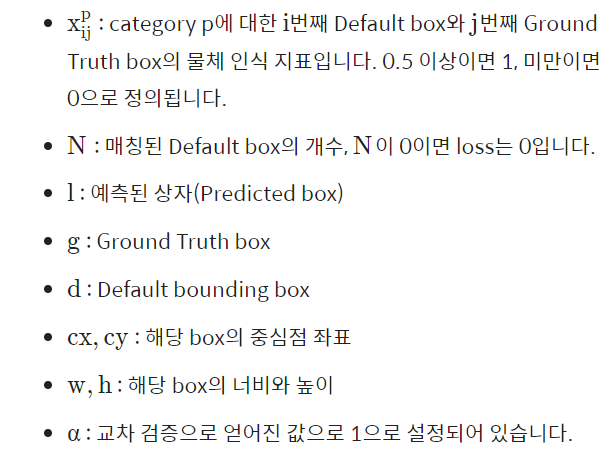

### Objective Loss Function

전체 로스는 각 클래스 별로 예측한 값과 실제값 사이의 차이인 L(conf)와 bounding box regression 예측값과 실제값 사이의 차이인 L(loc)를 더한 값이다.

### Localization Loss Function

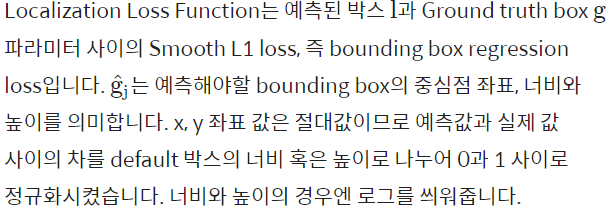

### Confidence Loss Function

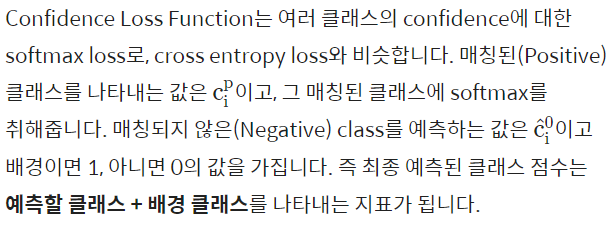

### Hard negative mining

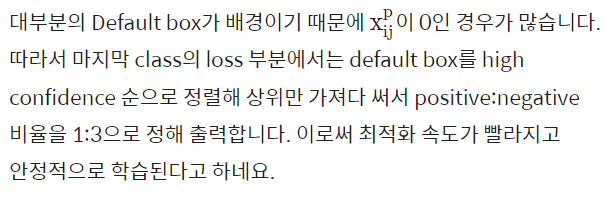

### SSD의 성능

SSD의 성능은 아래와 같이 Faster R-CNN보다 성능이 조금 낮지만 속도는 빠르고, YOLO보다는 성능이 높고 속도는 느리다. SSD가 속도와 정확성을 동시에 잡자는 목표를 갖고 있었다는 것을 생각해보면, 그 목표는 이룬 것 같다.

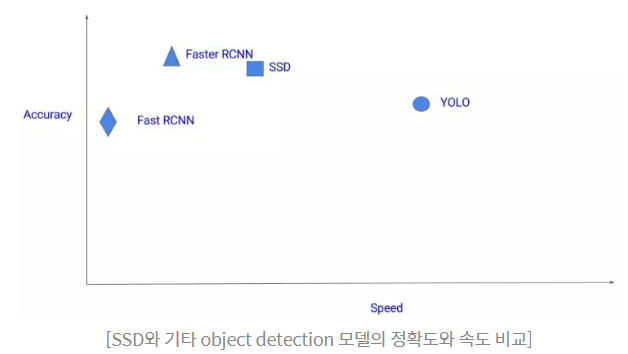

https://cv-tricks.com/object-detection/faster-r-cnn-yolo-ssd/

YOLO가 작은 물체를 잘 찾아내지 못했던 것 역시 SSD에서는 어느 정도 해결한 것 같다. 심지어 YOLO v2보다 성능이 더 좋다는 것을 알 수 있다.

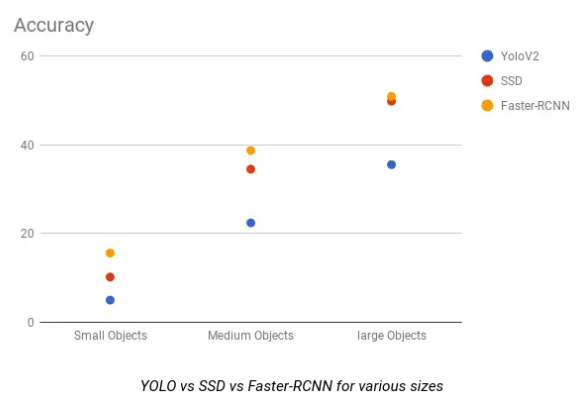

https://cv-tricks.com/object-detection/faster-r-cnn-yolo-ssd/


### FCOS

https://arxiv.org/pdf/1904.01355.pdf 는 기존의 anchor box 기반에서 벗어나 pixelwise로 예측하는 FCOS를 제안했다. Anchor box를 사용하면서 생기는 부작용 (예 : 학습 계산량, 하이퍼파라미터에 민감한 성능 등)을 해결하면서도 좋은 성능을 보인다.

자세한 내용은 아래 자료를 참고한다.

https://blog.naver.com/jinyuri303/221876480557

### 13-11 Face Detection을 위한 모델들

지금까지 One-Stage Detection의 가장 대표적인 두가지 모델인 YOLO와 SSD에 대해 살펴보았다. 다음 실습에서는 SSD를 활용한 Face Detection을 실제로 구현해 보는 과정을 통해 더욱 깊이있게 알아보게 될 것이다. 

SSD 이후로 특히 Face Detection 모델이 지속적으로 발표되었다. https://paperswithcode.com/task/face-detection 에서 검색하면 Face Detection에 대한 다양한 모델을 살펴볼 수 있다.

그럼 SOTA Face Detection 모델을 중심으로 간단히 살펴보자.

### TinaFace

논문 https://arxiv.org/pdf/2011.13183v3.pdf 에서는 Face Detection과 Object Detection이 다르지 않다는 점을 지적하면서, Object Detection에서 사용했던 기법을 사용해 단순하지만 좋은 성능을 보이는 모델인 TinaFace를 소개한다.

TinaFace는 백본으로 ResNet50을 사용했고 기존에 존재했던 모듈(Feature Pyramid Network, Inception block, FCN 등)을 활용해 만들어졌다. 자세한 내용은 논문을 참고하자.

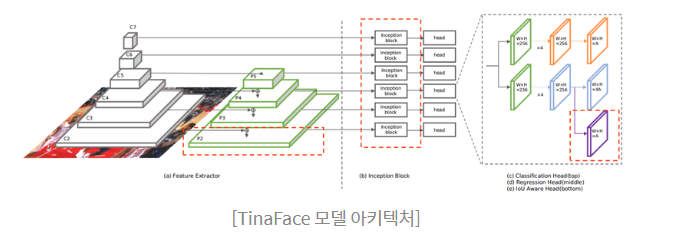

https://arxiv.org/pdf/2011.13183v3.pdf

### RetinaFace

RetinaFace는 1-Stage face detector로서, 다양한 얼굴 크기에 대해 pixel-wise face localization을 수행했다. 이를 위해 기존의 box classification과 regression 브랜치와 함께 extra-supervised and self-supervised multi-task learning을 하였다고 한다. 그 결과는 아래의 그림에 나와 있듯 face score, face box, 5개의 얼굴 랜드마크, 3D face vertices(정점)라고 한다. 자세한 내용은 논문 https://arxiv.org/pdf/1905.00641.pdf 을 참고한다.

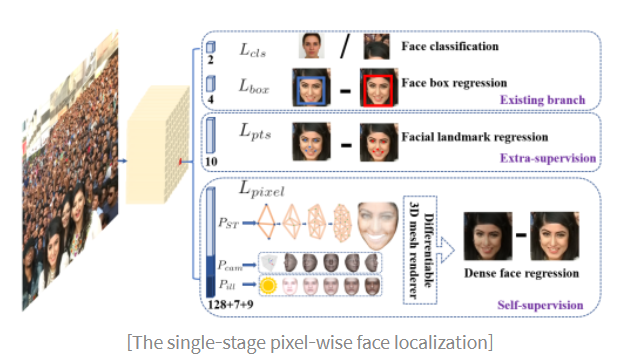

https://arxiv.org/pdf/1905.00641.pdf

### DSFD

DSFD는 Feature Enhance Module(FEM), Progressive Anchor Loss(PAL), Improved Anchor Matching (IAM)라는 기법을 사용해 성능을 높인 모델이다. 언급한 세 기법이 two-stream으로 디자인되어 있어서 Dual Shot Face Detector라는 이름이 붙었다고 한다. 자세한 내용은 논문 https://arxiv.org/pdf/1810.10220.pdf 을 참고하자.

### S3FD

S3FD는 하나의 S3FD는 하나의 deep nearal network를 사용해 다양한 얼굴 크기에 대해 face detection을 수행하며, 특히 작은 얼굴을 잘 찾는 모델이다. 다양한 크기의 얼굴을 잘 찾기 위해 layer의 넓은 범위에 anchor를 바둑판 형식으로 배열하였고, anchor 크기도 새롭게 디자인했다. 그 외에도 작은 얼굴을 잘 찾기 위한 다양한 기법을 사용했다고 한다. 자세한 내용은 논문 https://arxiv.org/abs/1708.05237 을 참고하자.


#### 지금까지 몇 가지 Face Detection 모델을 살펴보았다. 이외에도 많은 모델이 있으니 관심이 있다면 살펴보길 바란다.